## Importing Required packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import keras
from tensorflow.keras import models, datasets, layers, optimizers,initializers

## Loading MNIST data set using datasets module

In [2]:
(X_train_full, y_train_full), (X_test, y_test) = datasets.fashion_mnist.load_data() # Loading train and test directly from datasets module

4431872/4422102 [==============================] - 0s 0us/step


## Exploratory Data Analysis

In [3]:
X_train_full.shape # returns shape of data

(60000, 28, 28)

In [4]:
X_test.shape # returns shape of data

(10000, 28, 28)

## Dividing data into train and valid sets

In [5]:
X_train, X_valid = X_train_full[:50000], X_train_full[50000:]
y_train, y_valid = y_train_full[:50000], y_train_full[50000:]

In [6]:
X_train.shape # returns shape of data

(50000, 28, 28)

In [7]:
X_valid.shape # returns shape of data

(10000, 28, 28)

**Visualizing data**

9


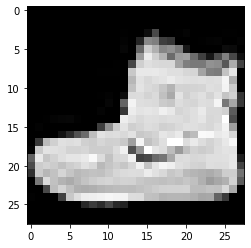

In [8]:
plt.imshow(X_train[0], cmap="gray")
print(y_train[0]);

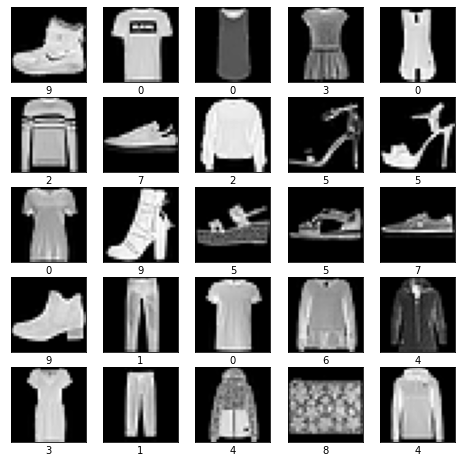

In [9]:
plt.figure(figsize=(8, 8))

for i in range(25):
  plt.subplot(5, 5, i+1)
  plt.imshow(X_train[i], cmap="gray")
  plt.xlabel(y_train[i])
  plt.xticks([])
  plt.yticks([]);

**Scaling Pixel values by dividing them with 255**

In [10]:
X_train = X_train/255
X_valid = X_valid/255
X_test = X_test/255

## ANN Model 1



1.   **Activation: Softmax**
2.   **Optimizer: SGD**
3. **No hidden layers, only one input and output layer**
4. **Batch Size: Default**



In [11]:
# Defining the input parameters for ANN Model 1
neurons=10
activation_fun_1='softmax' # Using 'softmax' as activation function
optimizer_1='sgd' # Using 'stochastic gradient descent' as optimizer 

In [12]:
# ANN Model 1
ANN_1 = models.Sequential() # Creating sequential model
ANN_1.add(layers.Flatten(input_shape=(28, 28))) # First layer, converts input image into a 1D Array
ANN_1.add(layers.Dense(neurons, activation=activation_fun_1)) # Output layer with 10 neurons, activation as 'softmax'
ANN_1.compile(optimizer=optimizer_1,loss='sparse_categorical_crossentropy',metrics=['accuracy']) # Compiling the model with sgd as optimizer
ANN_1.summary() #returns summary of the model

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 10)                7850      
                                                                 
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________


In [13]:
info = ANN_1.fit(X_train, y_train, epochs=10, validation_data=(X_valid, y_valid)) ## Fitting the model and validating data

Epoch 1/10
1563/1563 [==============================] - 4s 2ms/step - loss: 0.8597 - accuracy: 0.7303 - val_loss: 0.6546 - val_accuracy: 0.7859
Epoch 2/10
1563/1563 [==============================] - 3s 2ms/step - loss: 0.6094 - accuracy: 0.8040 - val_loss: 0.5782 - val_accuracy: 0.8087
Epoch 3/10
1563/1563 [==============================] - 3s 2ms/step - loss: 0.5559 - accuracy: 0.8191 - val_loss: 0.5426 - val_accuracy: 0.8164
Epoch 4/10
1563/1563 [==============================] - 3s 2ms/step - loss: 0.5272 - accuracy: 0.8273 - val_loss: 0.5251 - val_accuracy: 0.8183
Epoch 5/10
1563/1563 [==============================] - 3s 2ms/step - loss: 0.5088 - accuracy: 0.8320 - val_loss: 0.5091 - val_accuracy: 0.8232
Epoch 6/10
1563/1563 [==============================] - 3s 2ms/step - loss: 0.4951 - accuracy: 0.8350 - val_loss: 0.4959 - val_accuracy: 0.8279
Epoch 7/10
1563/1563 [==============================] - 3s 2ms/step - loss: 0.4847 - accuracy: 0.8386 - val_loss: 0.4909 - val_accuracy:

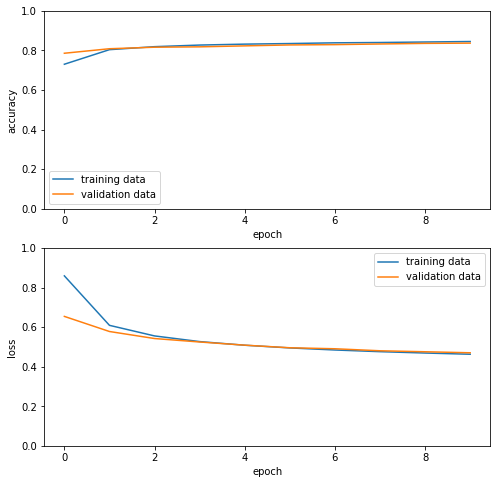

In [14]:
# Plots for accuracy vs epochs and loss vs epochs

# Loading accuracy values
acc = info.history['accuracy']
val_acc = info.history['val_accuracy']

# Loading loss values
loss = info.history['loss']
val_loss = info.history['val_loss']

# Defining plot size
plt.figure(figsize=(8, 8))

# Defining plot for accuracy vs epochs for training and validation data
plt.subplot(2, 1, 1)
plt.plot(acc, label='training data')
plt.plot(val_acc, label='validation data')
plt.ylim([0,1.0])
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend()

# Defining plot for loss vs epochs for training and validation data
plt.subplot(2, 1, 2)
plt.plot(loss, label='training data')
plt.plot(val_loss, label='validation data')
plt.ylim([0,1])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend();

In [15]:
# Classifaction report for Model 1
from sklearn.metrics import classification_report
y_pred = ANN_1.predict(X_test)
y_pred_labels = [np.argmax(i) for i in y_pred]
print(classification_report(y_test, y_pred_labels))

              precision    recall  f1-score   support

           0       0.83      0.77      0.80      1000
           1       0.97      0.95      0.96      1000
           2       0.73      0.69      0.71      1000
           3       0.83      0.86      0.84      1000
           4       0.70      0.78      0.74      1000
           5       0.94      0.88      0.91      1000
           6       0.59      0.57      0.58      1000
           7       0.88      0.91      0.89      1000
           8       0.93      0.94      0.93      1000
           9       0.90      0.94      0.92      1000

    accuracy                           0.83     10000
   macro avg       0.83      0.83      0.83     10000
weighted avg       0.83      0.83      0.83     10000



**ANN Model 2**

1. **Activation : Relu**
2. **Optimizer  : SGD**
3. **Number of Hidden Layers: 2**
4. **Neurons in 1st Layer: 300**
5. **Neurons in 2nd layer: 100**
6. **Batch Size: defined in fit statement**
7. **Intialization: Default(Glorot)**







In [16]:
# Defining Parameters for ANN 2
activation_fun_2='relu' # using 'relu' as activation function
optimizer_2='sgd' # using sgd as optimizer

In [17]:

ANN_2 = models.Sequential() # Creating sequential model
ANN_2.add(layers.Flatten(input_shape=(28, 28))) # First layer, converts input image into a 1D Array
ANN_2.add(layers.Dense(300, activation=activation_fun_2)) # Hidden layer 1 with 300 Neurons and relu activation
ANN_2.add(layers.Dense(100, activation=activation_fun_2)) # Hidden layer 2 with 100 Neurons and relu activation
ANN_2.add(layers.Dense(10, activation='softmax')) # Output layer with 10 neurons
ANN_2.compile(optimizer=optimizer_2,loss='sparse_categorical_crossentropy',metrics=['accuracy'])
ANN_2.summary() # prints summary for model 2

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_1 (Dense)             (None, 300)               235500    
                                                                 
 dense_2 (Dense)             (None, 100)               30100     
                                                                 
 dense_3 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [18]:
info = ANN_2.fit(X_train, y_train, epochs=10, batch_size=32,validation_data=(X_valid, y_valid)) # Fitting and validating model

Epoch 1/10
1563/1563 [==============================] - 7s 4ms/step - loss: 0.7265 - accuracy: 0.7636 - val_loss: 0.5508 - val_accuracy: 0.8046
Epoch 2/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.4951 - accuracy: 0.8294 - val_loss: 0.4666 - val_accuracy: 0.8370
Epoch 3/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.4460 - accuracy: 0.8445 - val_loss: 0.4377 - val_accuracy: 0.8452
Epoch 4/10
1563/1563 [==============================] - 7s 4ms/step - loss: 0.4197 - accuracy: 0.8528 - val_loss: 0.5316 - val_accuracy: 0.8001
Epoch 5/10
1563/1563 [==============================] - 7s 5ms/step - loss: 0.3997 - accuracy: 0.8600 - val_loss: 0.3979 - val_accuracy: 0.8625
Epoch 6/10
1563/1563 [==============================] - 7s 4ms/step - loss: 0.3833 - accuracy: 0.8651 - val_loss: 0.4135 - val_accuracy: 0.8567
Epoch 7/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.3693 - accuracy: 0.8710 - val_loss: 0.3942 - val_accuracy:

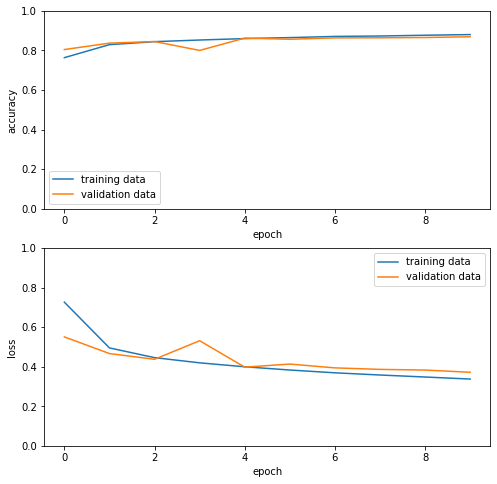

In [19]:
# Plots for accuracy vs epochs and loss vs epochs

# Loading accuracy values
acc = info.history['accuracy']
val_acc = info.history['val_accuracy']

# Loading loss values
loss = info.history['loss']
val_loss = info.history['val_loss']

# Defining plot size
plt.figure(figsize=(8, 8))

# Defining plot for accuracy vs epochs for training and validation data
plt.subplot(2, 1, 1)
plt.plot(acc, label='training data')
plt.plot(val_acc, label='validation data')
plt.ylim([0,1])
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend()

# Defining plot for loss vs epochs for training and validation data
plt.subplot(2, 1, 2)
plt.plot(loss, label='training data')
plt.plot(val_loss, label='validation data')
plt.ylim([0,1])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend();

In [20]:
# Classification report for ANN_2
from sklearn.metrics import classification_report
y_pred = ANN_2.predict(X_test)
y_pred_labels = [np.argmax(i) for i in y_pred]
print(classification_report(y_test, y_pred_labels))

              precision    recall  f1-score   support

           0       0.78      0.87      0.82      1000
           1       0.98      0.97      0.97      1000
           2       0.79      0.73      0.76      1000
           3       0.88      0.85      0.87      1000
           4       0.69      0.88      0.77      1000
           5       0.95      0.94      0.95      1000
           6       0.74      0.53      0.62      1000
           7       0.95      0.88      0.91      1000
           8       0.96      0.96      0.96      1000
           9       0.89      0.98      0.93      1000

    accuracy                           0.86     10000
   macro avg       0.86      0.86      0.86     10000
weighted avg       0.86      0.86      0.86     10000



**ANN Model 3**

1. **Activation : Relu**
2. **Optimizer: Adam**
3. **Number of Hidden Layers: 2**
4. **Weight Intialization: Random Normal**
5. **Neurons in 1st Layer: 100**
6. **Neurons in 2nd layer: 100**
7. **Learning rate: 0.01**
8. **Batch size: Default(32)**
9. **Batch Normalization and Dropout layers are used between each hidden layer**
10. **No reularization techiques used**







In [21]:
# Intializing Parameters
activation_fun_3='relu'
optimizer_3=tf.keras.optimizers.Adam(learning_rate=0.01,beta_1=0.9,beta_2=0.999)
kernel_initializer_3=initializers.RandomNormal(stddev=0.01)
# Model
ANN_3 = models.Sequential() # Creating sequential model
ANN_3.add(layers.Flatten(input_shape=(28, 28))) # First layer, converts input image into a 1D Array
ANN_3.add(layers.BatchNormalization()) # Adding Batch Normalization layer
# Hidden layer 1 with 100 Neurons, relu activation, weights intialized using random normal,
ANN_3.add(layers.Dense(100,activation=activation_fun_3,kernel_initializer=kernel_initializer_3))
ANN_3.add(layers.BatchNormalization()) # Adding Batch Normalization layer
ANN_3.add(layers.Dense(100, activation=activation_fun_3,kernel_initializer=kernel_initializer_3)) # Hidden layer 2 with 300 Neurons and relu activation
ANN_3.add(layers.BatchNormalization()) # Adding Batch Normalization layer
ANN_3.add(layers.Dropout(0.2)) # Adding Drop out layer
ANN_3.add(layers.Dense(10, activation='softmax')) # Output layer with 10 neurons
ANN_3.compile(optimizer=optimizer_3,loss='sparse_categorical_crossentropy',metrics=['accuracy'])
ANN_3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 batch_normalization (BatchN  (None, 784)              3136      
 ormalization)                                                   
                                                                 
 dense_4 (Dense)             (None, 100)               78500     
                                                                 
 batch_normalization_1 (Batc  (None, 100)              400       
 hNormalization)                                                 
                                                                 
 dense_5 (Dense)             (None, 100)               10100     
                                                                 
 batch_normalization_2 (Batc  (None, 100)             

In [22]:
info = ANN_3.fit(X_train, y_train, epochs=10, validation_data=(X_valid, y_valid))

Epoch 1/10
1563/1563 [==============================] - 9s 5ms/step - loss: 0.5444 - accuracy: 0.8076 - val_loss: 0.4438 - val_accuracy: 0.8285
Epoch 2/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.4387 - accuracy: 0.8418 - val_loss: 0.4351 - val_accuracy: 0.8378
Epoch 3/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.4086 - accuracy: 0.8526 - val_loss: 0.3862 - val_accuracy: 0.8590
Epoch 4/10
1563/1563 [==============================] - 7s 5ms/step - loss: 0.3903 - accuracy: 0.8575 - val_loss: 0.3832 - val_accuracy: 0.8603
Epoch 5/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.3723 - accuracy: 0.8646 - val_loss: 0.3703 - val_accuracy: 0.8660
Epoch 6/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.3564 - accuracy: 0.8702 - val_loss: 0.3509 - val_accuracy: 0.8695
Epoch 7/10
1563/1563 [==============================] - 7s 5ms/step - loss: 0.3435 - accuracy: 0.8755 - val_loss: 0.3369 - val_accuracy:

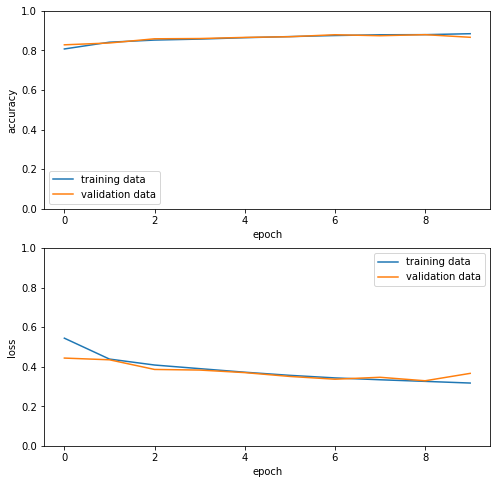

In [23]:
# Plots for accuracy vs epochs and loss vs epochs

# Loading accuracy values
acc = info.history['accuracy']
val_acc = info.history['val_accuracy']

# Loading loss values
loss = info.history['loss']
val_loss = info.history['val_loss']

# Defining plot size
plt.figure(figsize=(8, 8))

# Defining plot for accuracy vs epochs for training and validation data
plt.subplot(2, 1, 1)
plt.plot(acc, label='training data')
plt.plot(val_acc, label='validation data')
plt.ylim([0,1])
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend()

# Defining plot for loss vs epochs for training and validation data
plt.subplot(2, 1, 2)
plt.plot(loss, label='training data')
plt.plot(val_loss, label='validation data')
plt.ylim([0,1])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend();

In [24]:
from sklearn.metrics import classification_report
y_pred = ANN_3.predict(X_test)
y_pred_labels = [np.argmax(i) for i in y_pred]
print(classification_report(y_test, y_pred_labels))

              precision    recall  f1-score   support

           0       0.93      0.61      0.73      1000
           1       0.99      0.97      0.98      1000
           2       0.78      0.81      0.79      1000
           3       0.93      0.81      0.87      1000
           4       0.73      0.83      0.78      1000
           5       0.97      0.95      0.96      1000
           6       0.58      0.78      0.66      1000
           7       0.96      0.90      0.93      1000
           8       0.99      0.96      0.97      1000
           9       0.90      0.98      0.93      1000

    accuracy                           0.86     10000
   macro avg       0.88      0.86      0.86     10000
weighted avg       0.88      0.86      0.86     10000



**ANN 4**

1. **Activation : Relu**
2. **Optimizer: Adam**
3. **Regulrization: L2**
4. **Bias Intialization: Zeros**
5. **Number of Hidden Layers: 2**
6. **Weight Intialization: He Normal**
7. **Bias Intialization: zeros**
8. **Neurons in 1st Layer: 100**
9. **Neurons in 2nd layer: 100**
10. **Learning rate: 0.01**
11. **Batch size: Default**







In [25]:
# Intiating parameter values for ANN_4
activation_fun_4='relu' # Using 'ReLu' as activation function
optimizer_4=tf.keras.optimizers.Adam(learning_rate=0.01,beta_1=0.9,beta_2=0.999) # Adam optimizer with defined learning rate
kernel_initializer_4=initializers.he_normal # Using he_normal for intialization
kernel_regularizer=keras.regularizers.l2(0.01)
# Model
ANN_4 = models.Sequential() # Creating sequential model
ANN_4.add(layers.Flatten(input_shape=(28, 28))) # First layer, converts input image into a 1D Array
ANN_4.add(layers.BatchNormalization())
# Hidden layer 1 with 100 Neurons, relu activation, weights intialized using random normal,
ANN_4.add(layers.Dense(100,activation=activation_fun_4,kernel_initializer=kernel_initializer_4, bias_initializer=initializers.Zeros(),kernel_regularizer=kernel_regularizer))
ANN_4.add(layers.BatchNormalization()) # Adding layer for batch normalization
# Hidden layer 2 with 100 Neurons, relu activation, weights intialized using random normal,
ANN_4.add(layers.Dense(100, activation=activation_fun_4,kernel_initializer=kernel_initializer_4 ,kernel_regularizer=kernel_regularizer)) # Hidden layer 2 with 300 Neurons and relu activation
ANN_4.add(layers.BatchNormalization())# Adding layer for batch normalization
ANN_4.add(layers.Dropout(0.2)) # Adding layer for dropout
ANN_4.add(layers.Dense(10, activation='softmax')) # Output layer with 10 neurons
ANN_4.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.01,beta_1=0.9,beta_2=0.999),loss='sparse_categorical_crossentropy',metrics=['accuracy'])
ANN_4.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         (None, 784)               0         
                                                                 
 batch_normalization_3 (Batc  (None, 784)              3136      
 hNormalization)                                                 
                                                                 
 dense_7 (Dense)             (None, 100)               78500     
                                                                 
 batch_normalization_4 (Batc  (None, 100)              400       
 hNormalization)                                                 
                                                                 
 dense_8 (Dense)             (None, 100)               10100     
                                                                 
 batch_normalization_5 (Batc  (None, 100)             

In [26]:
info = ANN_4.fit(X_train, y_train, epochs=10, validation_data=(X_valid, y_valid)) # Fitting and validating ANN4

Epoch 1/10
1563/1563 [==============================] - 9s 5ms/step - loss: 1.3276 - accuracy: 0.7281 - val_loss: 0.9568 - val_accuracy: 0.7557
Epoch 2/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.8934 - accuracy: 0.7593 - val_loss: 0.7699 - val_accuracy: 0.7880
Epoch 3/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.8282 - accuracy: 0.7673 - val_loss: 0.6968 - val_accuracy: 0.8019
Epoch 4/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.7936 - accuracy: 0.7724 - val_loss: 0.7847 - val_accuracy: 0.7682
Epoch 5/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.7878 - accuracy: 0.7724 - val_loss: 0.7136 - val_accuracy: 0.7898
Epoch 6/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.7787 - accuracy: 0.7738 - val_loss: 0.7041 - val_accuracy: 0.7847
Epoch 7/10
1563/1563 [==============================] - 9s 6ms/step - loss: 0.7818 - accuracy: 0.7742 - val_loss: 0.7430 - val_accuracy:

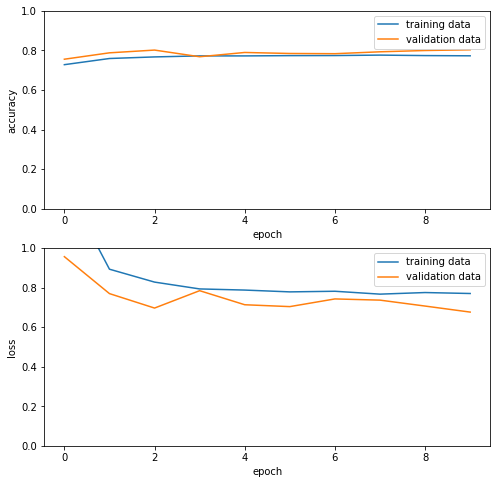

In [27]:
# Plots for accuracy vs epochs and loss vs epochs

# Loading accuracy values
acc = info.history['accuracy']
val_acc = info.history['val_accuracy']

# Loading loss values
loss = info.history['loss']
val_loss = info.history['val_loss']

# Defining plot size
plt.figure(figsize=(8, 8))

# Defining plot for accuracy vs epochs for training and validation data
plt.subplot(2, 1, 1)
plt.plot(acc, label='training data')
plt.plot(val_acc, label='validation data')
plt.ylim([0,1])
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend()

# Defining plot for loss vs epochs for training and validation data
plt.subplot(2, 1, 2)
plt.plot(loss, label='training data')
plt.plot(val_loss, label='validation data')
plt.ylim([0,1])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend();

In [28]:
# Classification report for ANN4
from sklearn.metrics import classification_report
y_pred = ANN_4.predict(X_test)
y_pred_labels = [np.argmax(i) for i in y_pred]
print(classification_report(y_test, y_pred_labels))

              precision    recall  f1-score   support

           0       0.75      0.80      0.78      1000
           1       0.97      0.94      0.95      1000
           2       0.57      0.82      0.67      1000
           3       0.77      0.87      0.82      1000
           4       0.70      0.57      0.63      1000
           5       0.92      0.84      0.88      1000
           6       0.66      0.39      0.49      1000
           7       0.87      0.87      0.87      1000
           8       0.95      0.94      0.94      1000
           9       0.85      0.94      0.89      1000

    accuracy                           0.80     10000
   macro avg       0.80      0.80      0.79     10000
weighted avg       0.80      0.80      0.79     10000



**ANN 5**

1. **Activation : Relu**
2. **Optimizer: Adam**
3. **Regulrization: L1**
4. **Bias Intialization: Zeros**
5. **Number of Hidden Layers: 2**
6. **Weight Intialization: Random Normal**
7. **Bias Intialization: zeros**
8. **Neurons in 1st Layer: 100**
9. **Neurons in 2nd layer: 100**
10. **Learning rate: 0.01**
11. **Batch size: Default**







In [29]:
# Intiating parameter values for ANN_5
activation_fun_5='relu' # Using 'ReLu' as activation function
optimizer_5=tf.keras.optimizers.Adam(learning_rate=0.01,beta_1=0.9,beta_2=0.999) # Adam optimizer with defined learning rate
kernel_initializer_5=initializers.RandomNormal(stddev=0.1) # Using random normal for intialization
kernel_regularizer=keras.regularizers.l1(0.01)
# Model
ANN_5 = models.Sequential() # Creating sequential model
ANN_5.add(layers.Flatten(input_shape=(28, 28))) # First layer, converts input image into a 1D Array
ANN_5.add(layers.BatchNormalization())
# Hidden layer 1 with 100 Neurons, relu activation, weights intialized using random normal,
ANN_5.add(layers.Dense(100,activation=activation_fun_5,kernel_initializer=kernel_initializer_5, bias_initializer=initializers.Zeros(),kernel_regularizer=kernel_regularizer))
ANN_5.add(layers.BatchNormalization()) # Adding layer for batch normalization
# Hidden layer 2 with 100 Neurons, relu activation, weights intialized using random normal,
ANN_5.add(layers.Dense(100, activation=activation_fun_5,kernel_initializer=kernel_initializer_5 ,kernel_regularizer=kernel_regularizer)) # Hidden layer 2 with 300 Neurons and relu activation
ANN_5.add(layers.BatchNormalization())# Adding layer for batch normalization
ANN_5.add(layers.Dropout(0.2)) # Adding layer for dropout
ANN_5.add(layers.Dense(10, activation='softmax')) # Output layer with 10 neurons
ANN_5.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.01,beta_1=0.9,beta_2=0.999),loss='sparse_categorical_crossentropy',metrics=['accuracy'])
ANN_5.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_4 (Flatten)         (None, 784)               0         
                                                                 
 batch_normalization_6 (Batc  (None, 784)              3136      
 hNormalization)                                                 
                                                                 
 dense_10 (Dense)            (None, 100)               78500     
                                                                 
 batch_normalization_7 (Batc  (None, 100)              400       
 hNormalization)                                                 
                                                                 
 dense_11 (Dense)            (None, 100)               10100     
                                                                 
 batch_normalization_8 (Batc  (None, 100)             

In [30]:
info = ANN_5.fit(X_train, y_train, epochs=10, validation_data=(X_valid, y_valid)) # Fitting and validating ANN5

Epoch 1/10
1563/1563 [==============================] - 10s 6ms/step - loss: 4.2683 - accuracy: 0.7033 - val_loss: 2.2002 - val_accuracy: 0.7553
Epoch 2/10
1563/1563 [==============================] - 9s 6ms/step - loss: 2.1803 - accuracy: 0.7411 - val_loss: 1.9793 - val_accuracy: 0.7823
Epoch 3/10
1563/1563 [==============================] - 9s 6ms/step - loss: 2.1423 - accuracy: 0.7450 - val_loss: 2.0956 - val_accuracy: 0.7692
Epoch 4/10
1563/1563 [==============================] - 9s 5ms/step - loss: 2.1271 - accuracy: 0.7473 - val_loss: 2.0303 - val_accuracy: 0.7754
Epoch 5/10
1563/1563 [==============================] - 10s 6ms/step - loss: 2.1142 - accuracy: 0.7505 - val_loss: 2.0255 - val_accuracy: 0.7842
Epoch 6/10
1563/1563 [==============================] - 9s 6ms/step - loss: 2.0977 - accuracy: 0.7489 - val_loss: 2.0280 - val_accuracy: 0.7623
Epoch 7/10
1563/1563 [==============================] - 9s 6ms/step - loss: 2.0990 - accuracy: 0.7490 - val_loss: 1.9667 - val_accurac

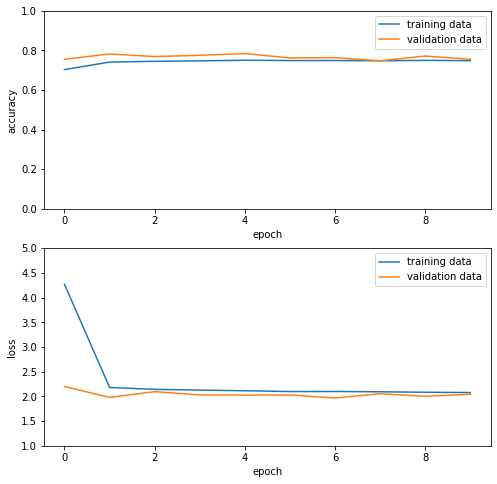

In [31]:
# Plots for accuracy vs epochs and loss vs epochs

# Loading accuracy values
acc = info.history['accuracy']
val_acc = info.history['val_accuracy']

# Loading loss values
loss = info.history['loss']
val_loss = info.history['val_loss']

# Defining plot size
plt.figure(figsize=(8, 8))

# Defining plot for accuracy vs epochs for training and validation data
plt.subplot(2, 1, 1)
plt.plot(acc, label='training data')
plt.plot(val_acc, label='validation data')
plt.ylim([0,1.0])
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend()

# Defining plot for loss vs epochs for training and validation data
plt.subplot(2, 1, 2)
plt.plot(loss, label='training data')
plt.plot(val_loss, label='validation data')
plt.ylim([1,5])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend();

In [32]:
# Classification report for ANN5
from sklearn.metrics import classification_report
y_pred = ANN_5.predict(X_test)
y_pred_labels = [np.argmax(i) for i in y_pred]
print(classification_report(y_test, y_pred_labels))

              precision    recall  f1-score   support

           0       0.69      0.78      0.73      1000
           1       0.92      0.95      0.94      1000
           2       0.77      0.56      0.64      1000
           3       0.76      0.81      0.78      1000
           4       0.55      0.84      0.66      1000
           5       0.68      0.93      0.78      1000
           6       0.46      0.25      0.32      1000
           7       0.91      0.62      0.74      1000
           8       0.92      0.87      0.89      1000
           9       0.89      0.88      0.88      1000

    accuracy                           0.75     10000
   macro avg       0.76      0.75      0.74     10000
weighted avg       0.76      0.75      0.74     10000



**ANN models with different parameters are studied and their classification reports along with accuracy and loss plots are attached at end of each model. We can observe the classification report of each model and change in parameter made compared to previous model. The results are fine in some models, overfitting in some and underfitting in some.**